<a href="https://colab.research.google.com/github/Andreagazy/Machine-Learning-2024/blob/main/Kuis2_ML_Kelompok5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Anggota Kelompok :

**SEPTA PUMA SURYA			NIM. 2241720119** <br>
**DIKA DWI ALAMSYAH 			NIM. 2241720129** <br>
**ANDREAGAZY IZA AMERIANTO	NIM. 2241720146** <br>
**FARID FITRIANSAH ALFARIZI		NIM. 2241720055** <br>

# KUIS 2 PEMBELAJARAN MESIN
Face Detection dan Face Recognition
# Intro

Pada kuis ini, Anda diminta untuk melakukan face detection dan face recognition pada wajah dengan menggunakan dataset primer (dataset wajah yang kalian kumpulkan sendiri).
Spesifikasi pengerjaan kuis yang harus dipehuni adalah,

1. Gunakan pre-trained model haarcascade_frontalface_default.xml untuk face detection
2. Gunakan pre-trained model faceNet untuk face recognition
3. Gunakan model CNN untuk face recognition

In [28]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
!pip install opencv-python-headless tensorflow keras_facenet scikit-learn matplotlib
!pip install keras-facenet


In [30]:
# Import libraries
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras_facenet import FaceNet
from tensorflow.keras.utils import to_categorical

In [31]:
# Load Haar Cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Function for face detection
def detect_faces(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    return faces

# Load dataset
dataset_path = '/content/drive/My Drive/Machine Learning Dataset'
labels = []
data = []

for person in os.listdir(dataset_path):
    person_path = os.path.join(dataset_path, person)
    if os.path.isdir(person_path):
        for image_name in os.listdir(person_path):
            image_path = os.path.join(person_path, image_name)
            image = cv2.imread(image_path)
            faces = detect_faces(image)

            # Crop and resize the face
            for (x, y, w, h) in faces:
                face = image[y:y+h, x:x+w]
                face = cv2.resize(face, (160, 160))  # Resizing for FaceNet
                data.append(face)
                labels.append(person)

# Convert data and labels to numpy arrays
data = np.array(data, dtype="float32") / 255.0  # Normalize
labels = np.array(labels)

# Encode labels
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)
labels_categorical = to_categorical(labels_encoded)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels_categorical, test_size=0.2, random_state=42)


In [32]:
# Load FaceNet model
facenet = FaceNet()

# Generate embeddings
X_train_embeddings = np.array([facenet.embeddings(face[np.newaxis, ...]) for face in X_train])
X_test_embeddings = np.array([facenet.embeddings(face[np.newaxis, ...]) for face in X_test])


1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms

In [33]:
# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(160, 160, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(le.classes_), activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.4534 - loss: 4.5505 - val_accuracy: 1.0000 - val_loss: 0.0152
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.9913 - loss: 0.0419 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.9995 - loss: 0.0081 - val_accuracy: 1.0000 - val_loss: 9.9186e-06
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.9979 - loss: 0.0080 - val_accuracy: 1.0000 - val_loss: 7.3222e-05
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.9984 - loss: 0.0134 - val_accuracy: 1.0000 - val_loss: 6.1468e-04
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 1.0000 - val_loss: 4.0238e-06
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 1.0000 - loss: 5.8562e-04 - val_accuracy: 1.0000 - val_loss: 1.9161e-06
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 1.0000 - loss: 8.1291e-04 - val_

In [34]:
# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 338ms/step - accuracy: 1.0000 - loss: 1.2808e-05
Test Loss: 1.2335766768956091e-05
Test Accuracy: 1.0


In [46]:
model.save("face_recognition_cnn.h5")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
Wajah dikenali sebagai: Dika dengan keyakinan 1.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


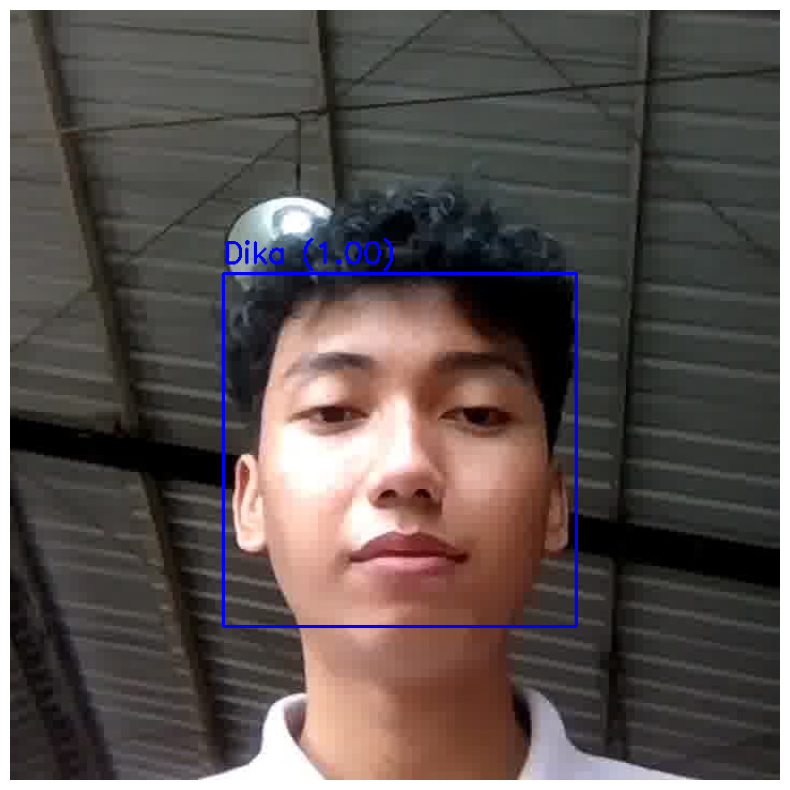

In [47]:
from tensorflow.keras.models import load_model

model = load_model("face_recognition_cnn.h5")
# Deteksi wajah di gambar input
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

for (x, y, w, h) in faces:
    # Potong dan preprocess wajah
    face = image[y:y+h, x:x+w]
    face = cv2.resize(face, (160, 160))  # Ukuran input model
    face = face.astype("float32") / 255.0  # Normalisasi
    face = np.expand_dims(face, axis=0)  # Tambahkan batch dimension
# Prediksi kelas
predictions = model.predict(face)
predicted_class_index = np.argmax(predictions)
confidence = predictions[0][predicted_class_index]

# Dapatkan label asli dari kelas yang diprediksi
predicted_label = le.inverse_transform([predicted_class_index])[0]

# Tampilkan hasil
if confidence > 0.8:  # Threshold confidence
    print(f"Wajah dikenali sebagai: {predicted_label} dengan keyakinan {confidence:.2f}")
else:
    print("Wajah tidak dikenali.")
# Baca gambar
image_path = '/content/drive/My Drive/Machine Learning Dataset/Dika/Dika (14).jpg'
image = cv2.imread(image_path)

if image is None:
    print("Gambar tidak ditemukan.")
else:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        # Crop wajah dan preprocess
        face = image[y:y+h, x:x+w]
        face = cv2.resize(face, (160, 160))
        face = face.astype("float32") / 255.0
        face = np.expand_dims(face, axis=0)

        # Prediksi wajah
        predictions = model.predict(face)
        predicted_class_index = np.argmax(predictions)
        confidence = predictions[0][predicted_class_index]

        # Konversi indeks ke label nama
        predicted_label = le.inverse_transform([predicted_class_index])[0]

        # Tambahkan bounding box dan label
        label = f"{predicted_label} ({confidence:.2f})" if confidence > 0.8 else "Unknown"
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(image, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    # Tampilkan gambar
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


Saving TestDeteksi.jpg to TestDeteksi (1).jpg
File diunggah: TestDeteksi (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


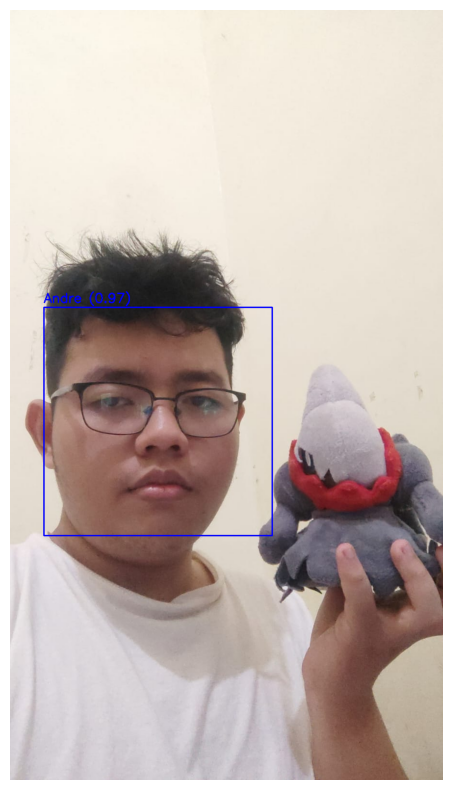

In [51]:
from google.colab import files

# Izinkan pengguna untuk mengunggah file
uploaded = files.upload()

# Ambil nama file yang diunggah
for file_name in uploaded.keys():
    print(f"File diunggah: {file_name}")
    image_path = file_name
# Baca file yang diunggah atau dipilih
image = cv2.imread(image_path)

if image is None:
    print("Gambar tidak ditemukan atau gagal dimuat.")
else:
    # Lanjutkan proses deteksi wajah seperti sebelumnya
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        # Crop dan preprocess wajah
        face = image[y:y+h, x:x+w]
        face = cv2.resize(face, (160, 160))
        face = face.astype("float32") / 255.0
        face = np.expand_dims(face, axis=0)

        # Prediksi wajah
        predictions = model.predict(face)
        predicted_class_index = np.argmax(predictions)
        confidence = predictions[0][predicted_class_index]

        # Konversi indeks ke label nama
        predicted_label = le.inverse_transform([predicted_class_index])[0]

        # Tambahkan bounding box dan label
        label = f"{predicted_label} ({confidence:.2f})" if confidence > 0.8 else "Unknown"
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(image, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    # Tampilkan gambar
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
